In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io

In [2]:
from google.colab import files
uploded=files.upload()

Saving insurance_claims.csv to insurance_claims.csv


In [3]:
ins=pd.read_csv(io.BytesIO(uploded['insurance_claims.csv']))
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,"521,585",10/17/2014,OH,250/500,1000,1407,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,"342,868",6/27/2006,IN,250/500,2000,1197,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,"687,698",9/6/2000,OH,100/300,2000,1413,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,"227,811",5/25/1990,IL,250/500,2000,1416,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,"367,455",6/6/2014,IL,500/1000,1000,1584,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
ins.dtypes

months_as_customer               int64
age                              int64
policy_number                   object
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium            int64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
ins.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.026807,0.004996,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.029188,0.014394,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_deductable,0.026807,0.029188,1.000000,-0.003240,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.004996,0.014394,-0.003240,1.000000,-0.006231,0.032354,-0.013781,0.023552,-0.001558,-0.046064,0.026748,0.002342,0.009114,-0.017601,-0.011609,0.020256,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.010870,-0.006231,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.035212,-0.013781,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.023544,0.023552,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001558,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.046064,-0.021270,0.027448,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393,0.034554,NaN


In [6]:
ins['_c39'].isna().value_counts()

True    1000
Name: _c39, dtype: int64

In [7]:
#It is safe to say we can drop column ins['_c39']
ins.drop('_c39',axis=1,inplace=True)
ins.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,"521,585",10/17/2014,OH,250/500,1000,1407,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,"342,868",6/27/2006,IN,250/500,2000,1197,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,"687,698",9/6/2000,OH,100/300,2000,1413,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,"227,811",5/25/1990,IL,250/500,2000,1416,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,"367,455",6/6/2014,IL,500/1000,1000,1584,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


## TRANSFORM DATA

We need to create dummy vaulues for the non-numerical values so as to be able to transform the data 

In [8]:
ins['bodily_injuries']

0      1
1      0
2      2
3      1
4      0
      ..
995    0
996    2
997    2
998    0
999    0
Name: bodily_injuries, Length: 1000, dtype: int64

In [9]:
Policy_Number=pd.get_dummies(ins['policy_number'])
bind_date=pd.get_dummies(ins['policy_bind_date'])
Policy_state=pd.get_dummies(ins['policy_state'])
Policy_csl=pd.get_dummies(ins['policy_csl'])
Insured_zip=pd.get_dummies(ins['insured_zip'])
Insured_sex=pd.get_dummies(ins['insured_sex'])
Education_level=pd.get_dummies(ins['insured_education_level'])
Insured_Occupation=pd.get_dummies(ins['insured_occupation'])
Insured_relationship=pd.get_dummies(ins['insured_relationship'])
Incident_date=pd.get_dummies(ins['incident_date'])
Incident_type=pd.get_dummies(ins['incident_type'])
Collision_type=pd.get_dummies(ins['collision_type'])
Incident_severity=pd.get_dummies(ins['incident_severity'])
Authorities_contacted=pd.get_dummies(ins['authorities_contacted'])
Incident_state=pd.get_dummies(ins['incident_state'])
Incident_city=pd.get_dummies(ins['incident_city'])
Incident_location=pd.get_dummies(ins['incident_location'])
Property_damage=pd.get_dummies(ins['property_damage'])
Report=pd.get_dummies(ins['police_report_available'])
Auto_make=pd.get_dummies(ins['auto_make'])
Auto_model=pd.get_dummies(ins['auto_model'])
Auto_year=pd.get_dummies(ins['auto_year'])


In [10]:
bind_date.nunique()

1/1/2006     2
1/1/2008     2
1/10/2004    2
1/10/2012    2
1/11/2009    2
            ..
9/6/2005     2
9/6/2008     2
9/7/1999     2
9/7/2006     2
9/8/2009     2
Length: 951, dtype: int64

In [11]:
ins_b=pd.concat([Policy_Number,bind_date,Policy_state,Policy_csl,Insured_zip,Insured_sex,Education_level,Insured_Occupation,Insured_relationship,Incident_date,Incident_type,Collision_type,Incident_state,Incident_severity,Authorities_contacted,Incident_city,Incident_location,Property_damage,Auto_make,Auto_model,Auto_year,Report],axis=1)

In [12]:
ins_b.fillna(0,inplace=True)
ins_b

,"100,804","101,421","104,594","106,186","106,873","107,181","108,270","108,844","109,392","110,084",...,2009,2010,2011,2012,2013,2014,2015,?,NO,YES
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
ins.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
ins.drop(['policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl','insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location','property_damage','police_report_available','auto_make',
       'auto_model', 'auto_year'],axis=1,inplace=True)
ins

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,1000,1407,0,53300,0,5,1,1,2,71610,6510,13020,52080,Y
1,228,42,2000,1197,5000000,0,0,8,1,0,0,5070,780,780,3510,Y
2,134,29,2000,1413,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,N
3,256,41,2000,1416,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,Y
4,228,44,1000,1584,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,1311,0,0,0,20,1,0,1,87200,17440,8720,61040,N
996,285,41,1000,1437,0,70900,0,23,1,2,3,108480,18080,18080,72320,N
997,130,34,500,1383,3000000,35100,0,4,3,2,3,67500,7500,7500,52500,N
998,458,62,2000,1357,5000000,0,0,2,1,0,1,46980,5220,5220,36540,N


In [15]:
ins.dtypes

months_as_customer              int64
age                             int64
policy_deductable               int64
policy_annual_premium           int64
umbrella_limit                  int64
capital-gains                   int64
capital-loss                    int64
incident_hour_of_the_day        int64
number_of_vehicles_involved     int64
bodily_injuries                 int64
witnesses                       int64
total_claim_amount              int64
injury_claim                    int64
property_claim                  int64
vehicle_claim                   int64
fraud_reported                 object
dtype: object

In [16]:
fraudulent_claim=ins['fraud_reported']
fraudulent_claim

0      Y
1      Y
2      N
3      Y
4      N
      ..
995    N
996    N
997    N
998    N
999    N
Name: fraud_reported, Length: 1000, dtype: object

In [17]:
ins.drop(['fraud_reported'],axis=1,inplace=True)
ins.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,1407,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,1197,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,1413,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,1416,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,1584,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [18]:
ins.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
months_as_customer,1.000000,0.922098,0.026807,0.004996,0.015498,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013
age,0.922098,1.000000,0.029188,0.014394,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588
policy_deductable,0.026807,0.029188,1.000000,-0.003240,0.010870,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269
policy_annual_premium,0.004996,0.014394,-0.003240,1.000000,-0.006231,-0.013781,0.023552,-0.001558,-0.046064,0.026748,0.002342,0.009114,-0.017601,-0.011609,0.020256
umbrella_limit,0.015498,0.018126,0.010870,-0.006231,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584
capital-gains,0.006399,-0.007075,0.035212,-0.013781,-0.047268,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836
capital-loss,0.020209,0.007368,-0.023544,0.023552,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001558,-0.023257,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.046064,-0.021270,0.061643,-0.014895,0.120794,1.000000,0.014030,-0.014669,0.274278,0.224650,0.219084,0.269393
bodily_injuries,-0.010162,-0.015679,-0.022765,0.026748,0.022743,0.055829,-0.024418,-0.034563,0.014030,1.000000,-0.005606,0.047093,0.047319,0.039749,0.043449


In [19]:
ins=pd.concat([ins,ins_b],axis=1)
ins.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,2009,2010,2011,2012,2013,2014,2015,?,NO,YES
0,328,48,1000,1407,0,53300,0,5,1,1,...,0,0,0,0,0,0,0,0,0,1
1,228,42,2000,1197,5000000,0,0,8,1,0,...,0,0,0,0,0,0,0,1,0,0
2,134,29,2000,1413,5000000,35100,0,7,3,2,...,0,0,0,0,0,0,0,0,1,0
3,256,41,2000,1416,6000000,48900,-62400,5,1,1,...,0,0,0,0,0,1,0,0,1,0
4,228,44,1000,1584,6000000,66000,-46000,20,1,0,...,1,0,0,0,0,0,0,0,1,0


(array([[4167.,    0.,    0., ...,    0.,    0.,    0.],
        [4166.,    0.,    0., ...,    0.,    0.,    0.],
        [4166.,    0.,    0., ...,    0.,    0.,    0.],
        ...,
        [4166.,    0.,    0., ...,    0.,    0.,    0.],
        [4166.,    0.,    0., ...,    0.,    0.,    0.],
        [4167.,    0.,    0., ...,    0.,    0.,    0.]]),
 array([-1000000.,   100000.,  1200000.,  2300000.,  3400000.,  4500000.,
         5600000.,  6700000.,  7800000.,  8900000., 10000000.]),
 <a list of 1000 Lists of Patches objects>)

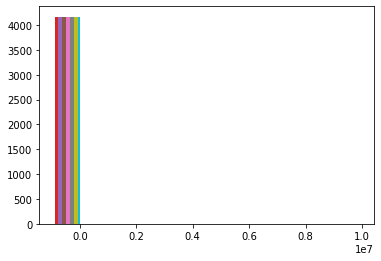

In [20]:
plt.hist(ins)

In [21]:
ins.columns

Index([         'months_as_customer',                         'age',
                 'policy_deductable',       'policy_annual_premium',
                    'umbrella_limit',               'capital-gains',
                      'capital-loss',    'incident_hour_of_the_day',
       'number_of_vehicles_involved',             'bodily_injuries',
       ...
                                2009,                          2010,
                                2011,                          2012,
                                2013,                          2014,
                                2015,                           '?',
                                'NO',                         'YES'],
      dtype='object', length=4167)

### FEATURE ENGINEERING 

In [22]:
ins.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,2009,2010,2011,2012,2013,2014,2015,?,NO,YES
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.409000,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,...,0.050000,0.050000,0.053000,0.04600,0.049000,0.044000,0.047000,0.343000,0.343000,0.314000
std,115.113174,9.140287,611.864673,244.185192,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,...,0.218054,0.218054,0.224146,0.20959,0.215976,0.205198,0.211745,0.474949,0.474949,0.464349
min,0.000000,19.000000,500.000000,433.000000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.500000,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,38.000000,1000.000000,1257.000000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,276.250000,44.000000,2000.000000,1416.000000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,479.000000,64.000000,2000.000000,2048.000000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
scaler=StandardScaler().fit(ins)
ins_final=scaler.transform(ins)

ins_final

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 0.2089946 ,  0.33407345,  1.41278352, ...,  1.38399852,
        -0.72254413, -0.67655447],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.72254413,
         1.38399852, -0.67655447],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.19064515,  2.3043625 , -0.22238259, ...,  1.38399852,
        -0.72254413, -0.67655447]])

(array([ 16.,  74., 187., 188., 173., 172.,  76.,  50.,  37.,  27.]),
 array([-2.18351811, -1.69094584, -1.19837358, -0.70580132, -0.21322906,
         0.2793432 ,  0.77191546,  1.26448773,  1.75705999,  2.24963225,
         2.74220451]),
 <a list of 10 Patch objects>)

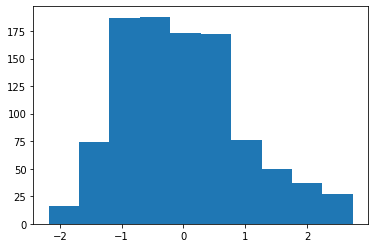

In [24]:
plt.hist(ins_final[:, 1])

In [25]:
ins_final.view()


array([[ 1.07813958,  0.99083647, -0.22238259, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 0.2089946 ,  0.33407345,  1.41278352, ...,  1.38399852,
        -0.72254413, -0.67655447],
       [-0.60800168, -1.08891308,  1.41278352, ..., -0.72254413,
         1.38399852, -0.67655447],
       ...,
       [-0.64276748, -0.54161057, -1.03996564, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.20802805,  2.52328351,  1.41278352, ..., -0.72254413,
        -0.72254413,  1.47807759],
       [ 2.19064515,  2.3043625 , -0.22238259, ...,  1.38399852,
        -0.72254413, -0.67655447]])

In [26]:
ins_final=pd.DataFrame(ins_final,columns=[ins.columns])
ins_final.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,2009,2010,2011,2012,2013,2014,2015,?,NO,YES
0,1.078140,0.990836,-0.222383,0.617017,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,...,-0.229416,-0.229416,-0.236572,-0.219586,-0.226991,-0.214535,-0.222076,-0.722544,-0.722544,1.478078
1,0.208995,0.334073,1.412784,-0.243417,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,...,-0.229416,-0.229416,-0.236572,-0.219586,-0.226991,-0.214535,-0.222076,1.383999,-0.722544,-0.676554
2,-0.608002,-1.088913,1.412784,0.641601,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,...,-0.229416,-0.229416,-0.236572,-0.219586,-0.226991,-0.214535,-0.222076,-0.722544,1.383999,-0.676554
3,0.452355,0.224613,1.412784,0.653892,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,...,-0.229416,-0.229416,-0.236572,-0.219586,-0.226991,4.661252,-0.222076,-0.722544,1.383999,-0.676554
4,0.208995,0.552994,-0.222383,1.342239,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,...,4.358899,-0.229416,-0.236572,-0.219586,-0.226991,-0.214535,-0.222076,-0.722544,1.383999,-0.676554
